In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


#NLTK-------------------------------
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Import libraries for feature 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/jiwonmoon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read data files
data = pd.read_csv('/Users/jiwonmoon/Desktop/CIS 508/Data Mining I/Assignments/Individual Assignment 5/Problem 1/CC GENERAL.csv')
display(data)

print(data.shape)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


(8950, 18)


# EDA

## 0. Whole Data

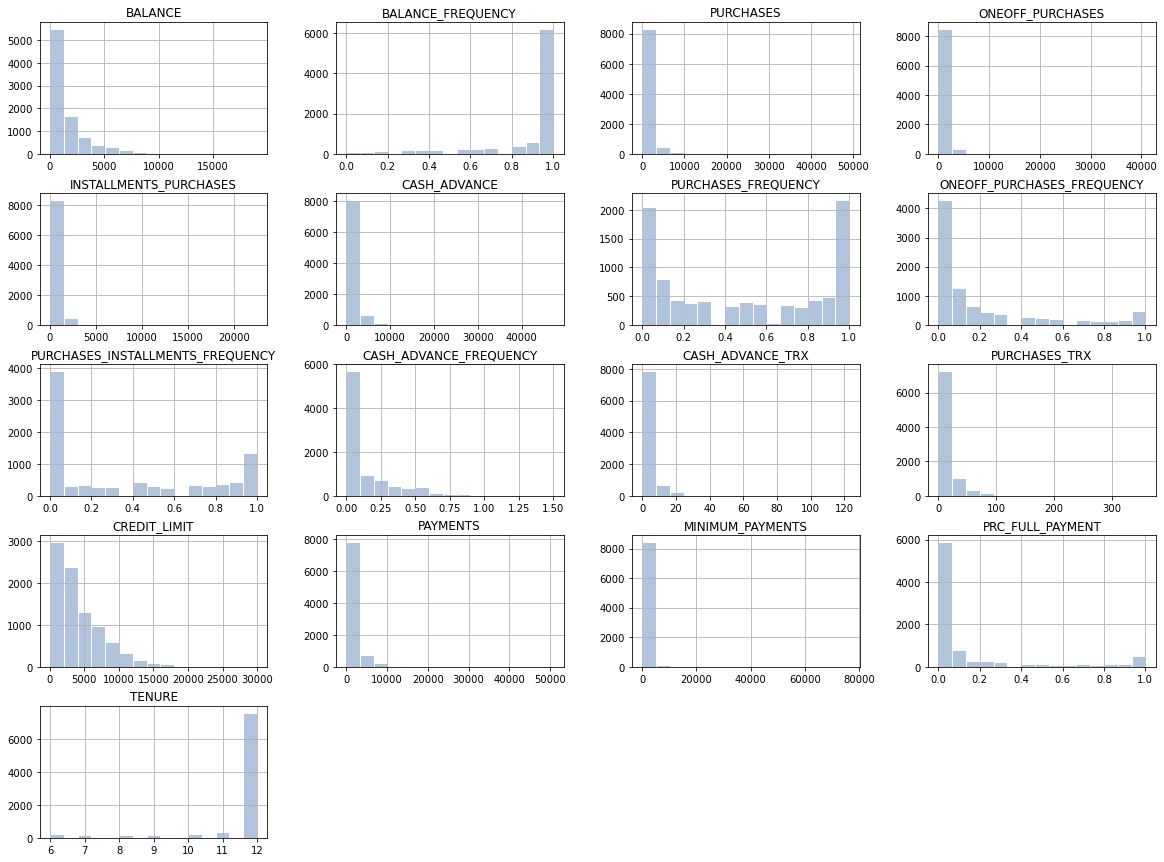

In [3]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns

data[num_col].hist(bins=15, color='#B0C4DE', edgecolor='white', figsize=(20, 15), layout=(5, 4));

## 1. Who makes frequent purchases using the credit card

In [4]:
# Rank by PURCHASES_FREQUENCY
purchase_freq = pd.DataFrame(data)

purchase_freq.loc[:, 'pf_rank'] = data.loc[:, 'PURCHASES_FREQUENCY'].rank(axis=0, ascending=False)

purchase_freq_rank = purchase_freq.sort_values(by=['pf_rank'], ascending=True)
purchase_freq_rank

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pf_rank
6460,C16637,68.007411,1.000000,488.66,0.00,488.66,0.000000,1.0,0.000000,0.900000,0.000000,0,19,1500.0,303.387025,143.461021,0.250000,10,1089.5
2074,C12140,788.973700,1.000000,4574.79,4149.47,425.32,2604.900847,1.0,0.583333,0.833333,0.166667,4,46,9500.0,5097.910730,366.740483,0.083333,12,1089.5
7932,C18147,1137.469948,1.000000,1865.56,280.60,1584.96,157.805480,1.0,0.250000,1.000000,0.083333,3,62,1200.0,990.084482,2405.692294,0.000000,12,1089.5
2076,C12142,25.352040,1.000000,355.16,0.00,355.16,0.000000,1.0,0.000000,0.916667,0.000000,0,12,2500.0,357.776573,170.557326,0.750000,12,1089.5
2077,C12143,2986.422406,1.000000,5132.08,4664.84,467.24,0.000000,1.0,1.000000,0.583333,0.000000,0,66,10000.0,11454.466230,910.850489,0.000000,12,1089.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,C13012,2136.814161,1.000000,0.00,0.00,0.00,2120.653422,0.0,0.000000,0.000000,0.333333,5,0,6000.0,1164.792197,527.241747,0.000000,12,7929.0
7478,C17681,1271.172501,0.909091,0.00,0.00,0.00,1865.939841,0.0,0.000000,0.000000,0.090909,1,0,4000.0,2099.387435,366.383649,0.000000,11,7929.0
2928,C13014,2637.334329,1.000000,0.00,0.00,0.00,1204.068667,0.0,0.000000,0.000000,0.583333,14,0,3000.0,525.003763,994.387979,0.000000,12,7929.0
4814,C14948,1747.359784,1.000000,0.00,0.00,0.00,413.380830,0.0,0.000000,0.000000,0.333333,8,0,1800.0,700.732344,755.249544,0.000000,12,7929.0


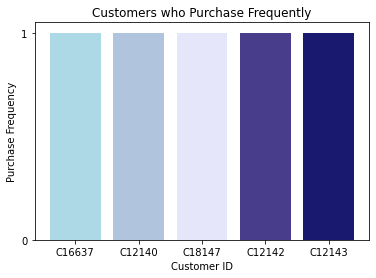

In [5]:
plt.title('Customers who Purchase Frequently')
plt.xlabel('Customer ID', fontsize=10)
plt.ylabel('Purchase Frequency', fontsize=10)

list_x = purchase_freq_rank['CUST_ID'].head()
list_y = purchase_freq_rank['PURCHASES_FREQUENCY'].head()

plt.bar(list_x, list_y, color=('#ADD8E6', '#B0C4DE', '#E6E6FA', '#483D8B', '#191970'))

plt.yticks(np.arange(0, 2, step=1), fontsize=10)
plt.show()

Top 5 are CUST_ID C16637, C12140, C18147, C12142, C12143.

In [6]:
# Those who has highest Purchase score (PURCHASES_FREQUENCY=1.0)
freq_purchase = data[data['PURCHASES_FREQUENCY']==1.0]
freq_purchase

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pf_rank
2,C10003,2495.148862,1.0,773.17,773.17,0.00,0.0,1.0,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,1089.5
6,C10007,627.260806,1.0,7091.01,6402.63,688.38,0.0,1.0,1.00,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12,1089.5
7,C10008,1823.652743,1.0,436.20,0.00,436.20,0.0,1.0,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,1089.5
10,C10011,1293.124939,1.0,920.12,0.00,920.12,0.0,1.0,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,1089.5
12,C10013,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.0,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,1089.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,C19177,108.977282,1.0,712.50,0.00,712.50,0.0,1.0,0.00,0.833333,0.0,0,6,1000.0,605.716356,86.868595,0.75,6,1089.5
8940,C19181,130.838554,1.0,591.24,0.00,591.24,0.0,1.0,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,1089.5
8942,C19183,40.829749,1.0,113.28,0.00,113.28,0.0,1.0,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,1089.5
8945,C19186,28.493517,1.0,291.12,0.00,291.12,0.0,1.0,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,1089.5


There are 2178 customers who purchases frequently.

In [7]:
# Check correlation between PURCHASES_FREQUENCY with other factors
corr = data.corr()
corr_pf = corr.loc[['PURCHASES_FREQUENCY'], :]
corr_pf

s = corr_pf.unstack()
s

corr_pf = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['correlation'])
corr_pf.style.background_gradient('PuBu')

,,correlation
PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,0.862934
PURCHASES_TRX,PURCHASES_FREQUENCY,0.568430
ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,0.501343
INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,0.442418
PURCHASES,PURCHASES_FREQUENCY,0.393017
PRC_FULL_PAYMENT,PURCHASES_FREQUENCY,0.305802
ONEOFF_PURCHASES,PURCHASES_FREQUENCY,0.264937
BALANCE_FREQUENCY,PURCHASES_FREQUENCY,0.229715
CREDIT_LIMIT,PURCHASES_FREQUENCY,0.119788
PAYMENTS,PURCHASES_FREQUENCY,0.103464


It seems like PURCHASES_INSTALLMENTS_FREQUENCY has the highest correlation rate with PURCHASES_FREQUENCY.

In [8]:
# Check PURCHASES_INSTALLMENTS_FREQUENCY
purchase_freq_rank[['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'pf_rank']]

,CUST_ID,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,pf_rank
6460,C16637,0.900000,1.0,1089.5
2074,C12140,0.833333,1.0,1089.5
7932,C18147,1.000000,1.0,1089.5
2076,C12142,0.916667,1.0,1089.5
2077,C12143,0.583333,1.0,1089.5
...,...,...,...,...
2926,C13012,0.000000,0.0,7929.0
7478,C17681,0.000000,0.0,7929.0
2928,C13014,0.000000,0.0,7929.0
4814,C14948,0.000000,0.0,7929.0


The customer who has the highest PURCHASES_INSTALLMENTS_FREQUENCY is among the top 5 of PURCHASES_FREQUENCY.

## 2. Who has high balances in their account

In [9]:
balance = pd.DataFrame(data)

balance.loc[:, 'balance_rank'] = data.loc[:, 'BALANCE'].rank(axis=0, ascending=False)
balance

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pf_rank,balance_rank
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5888.5,7682.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7929.0,1336.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1089.5,1852.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,6569.0,2738.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6569.0,4612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1089.5,7931.0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,1089.5,8182.0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2882.0,8059.0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7929.0,8359.0


In [10]:
# Those who has high balances
balance_rank = balance.sort_values(by=['balance_rank'], ascending=True)
balance_rank

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pf_rank,balance_rank
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12,1089.5,1.0
4140,C14256,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.000000,0.583333,1.000000,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12,1089.5,2.0
5488,C15642,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.500000,0.000000,0.416667,0.666667,13,9,19000.0,5337.961195,8345.641905,0.0,12,4345.0,3.0
6629,C16812,16259.44857,1.0,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.0,12,1089.5,4.0
5281,C15429,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.000000,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.0,12,1089.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,C18731,0.00000,0.0,113.00,0.00,113.00,0.000000,0.333333,0.000000,0.333333,0.000000,0,5,4000.0,268.521412,NaN,0.0,12,5077.0,8910.5
7186,C17381,0.00000,0.0,269.28,0.00,269.28,0.000000,0.750000,0.000000,0.750000,0.000000,0,9,1500.0,208.949793,NaN,0.0,12,3254.0,8910.5
8191,C18411,0.00000,0.0,52.50,0.00,52.50,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,3000.0,57.506797,NaN,0.0,12,4720.0,8910.5
654,C10680,0.00000,0.0,0.00,0.00,0.00,310.888779,0.000000,0.000000,0.000000,0.083333,1,0,9000.0,0.000000,NaN,0.0,12,7929.0,8910.5


<BarContainer object of 5 artists>

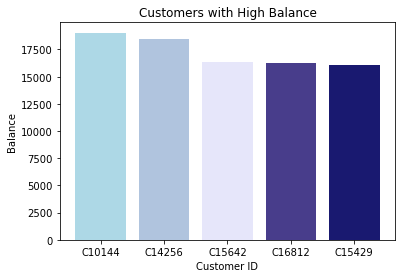

In [11]:
plt.title('Customers with High Balance')
plt.xlabel('Customer ID', fontsize=10)
plt.ylabel('Balance', fontsize=10)

list_x = balance_rank['CUST_ID'].head()
list_y = balance_rank['BALANCE'].head()

plt.bar(list_x, list_y, color=('#ADD8E6', '#B0C4DE', '#E6E6FA', '#483D8B', '#191970'))

CUST_ID C10144, C14256, C15642, C16812, C15429 are the top 5 regarding their remaining balance.

In [12]:
# Check correlation between PURCHASES_FREQUENCY with other factors
corr = data.corr()
corr_b = corr.loc[['BALANCE'], :]
corr_b

s = corr_b.unstack()
s

corr_b = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['correlation'])
corr_b.style.background_gradient()

,,correlation
CREDIT_LIMIT,BALANCE,0.531283
CASH_ADVANCE,BALANCE,0.496692
CASH_ADVANCE_FREQUENCY,BALANCE,0.449218
MINIMUM_PAYMENTS,BALANCE,0.398684
CASH_ADVANCE_TRX,BALANCE,0.385152
PAYMENTS,BALANCE,0.322802
BALANCE_FREQUENCY,BALANCE,0.322412
PURCHASES,BALANCE,0.181261
ONEOFF_PURCHASES,BALANCE,0.164350
PURCHASES_TRX,BALANCE,0.154338


It seems like CREDIT_LIMIT has the highest correlation rate with BALANCE.

In [13]:
# Check CREDIT_LIMIT
balance_rank[['CUST_ID', 'CREDIT_LIMIT', 'BALANCE', 'balance_rank']]

,CUST_ID,CREDIT_LIMIT,BALANCE,balance_rank
138,C10144,18000.0,19043.13856,1.0
4140,C14256,22000.0,18495.55855,2.0
5488,C15642,19000.0,16304.88925,3.0
6629,C16812,18000.0,16259.44857,4.0
5281,C15429,18000.0,16115.59640,5.0
...,...,...,...,...
8500,C18731,4000.0,0.00000,8910.5
7186,C17381,1500.0,0.00000,8910.5
8191,C18411,3000.0,0.00000,8910.5
654,C10680,9000.0,0.00000,8910.5


In [14]:
credit_limit = balance_rank[['CUST_ID', 'CREDIT_LIMIT', 'BALANCE', 'balance_rank']]

credit_limit.loc[:, 'credit_rank'] = data.loc[:, 'CREDIT_LIMIT'].rank(axis=0, ascending=False)
credit_limit

credit_limit_rank = credit_limit.sort_values(by=['CREDIT_LIMIT'], ascending=False)
credit_limit_rank

,CUST_ID,CREDIT_LIMIT,BALANCE,balance_rank,credit_rank
7046,C17237,30000.0,2980.054695,1463.0,1.5
4905,C15041,30000.0,1409.256223,3188.0,1.5
970,C11004,28000.0,3108.393701,1385.0,3.0
3659,C13762,25000.0,177.592802,6404.0,4.0
200,C10207,23000.0,43.103899,7630.0,5.5
...,...,...,...,...,...
2493,C12567,150.0,112.010460,6835.0,8946.0
3469,C13566,150.0,348.813275,5724.0,8946.0
5508,C15662,150.0,70.794108,7237.0,8946.0
6951,C17140,50.0,795.497557,4667.0,8949.0


In [15]:
credit = credit_limit_rank[credit_limit_rank['balance_rank']==1]
credit

,CUST_ID,CREDIT_LIMIT,BALANCE,balance_rank,credit_rank
138,C10144,18000.0,19043.13856,1.0,55.5


The top 5 customers regarding BALANCE are all within top 60 in terms of CREDIT_LIMIT.

# Clustering

## 1. PURCHASES_FREQUENCY

In [16]:
data_new = data.drop(['CUST_ID', 'pf_rank', 'balance_rank'], axis=1)
data_new = data_new.dropna(axis=0)
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
p = data_new.drop(['PURCHASES_FREQUENCY'], axis=1)

### K-Means Clustering

In [18]:
# Instantiate the KMeans for 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(p)

# Calculate Silhoutte Score
score = silhouette_score(p, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.386


In [19]:
cluster = p.copy()
cluster_pred = kmeans.predict(p)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[0 5 1 ... 0 0 0]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                    0.00                 0

In [20]:
# Instantiate the KMeans for 15 clusters
kmeans = KMeans(n_clusters=15, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(p)

# Calculate Silhoutte Score
score = silhouette_score(p, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.253


In [21]:
cluster = p.copy()
cluster_pred = kmeans.predict(p)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[0 9 3 ... 0 0 0]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                    0.00                 0

In [22]:
# Instantiate the KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(p)

# Calculate Silhoutte Score
score = silhouette_score(p, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.466


In [23]:
cluster = p.copy()
cluster_pred = kmeans.predict(p)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[1 0 0 ... 1 1 1]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0                   95.40      0.000000                    0.000000   
1                    0.00   6442.945483                    0.000000   
2                    0.00      0.000000                    1.000000   
4                    0.00      0.000000                    0.083333   
5                 1333.28      0.000000                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                    0.00                 0

3 clusters has the highest Silhouette Average Score of 0.466

## 2. BALANCE

In [24]:
# Splitting the data

b = data_new.drop(['BALANCE'], axis=1)

### K-Means Clustering

In [25]:
# Instantiate the KMeans for 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(b)

# Calculate Silhoutte Score
score = silhouette_score(b, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.389


In [26]:
cluster = b.copy()
cluster_pred = kmeans.predict(b)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[0 7 2 ... 0 0 0]
   BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.818182      95.40              0.00                   95.40   
1           0.909091       0.00              0.00                    0.00   
2           1.000000     773.17            773.17                    0.00   
4           1.000000      16.00             16.00                    0.00   
5           1.000000    1333.28              0.00                 1333.28   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.

In [27]:
# Instantiate the KMeans for 15 clusters
kmeans = KMeans(n_clusters=15, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(b)

# Calculate Silhoutte Score
score = silhouette_score(b, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.285


In [28]:
cluster = b.copy()
cluster_pred = kmeans.predict(b)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[0 1 4 ... 0 0 0]
   BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.818182      95.40              0.00                   95.40   
1           0.909091       0.00              0.00                    0.00   
2           1.000000     773.17            773.17                    0.00   
4           1.000000      16.00             16.00                    0.00   
5           1.000000    1333.28              0.00                 1333.28   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.

In [29]:
# Instantiate the KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(b)

# Calculate Silhoutte Score
score = silhouette_score(b, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.462


In [30]:
cluster = b.copy()
cluster_pred = kmeans.predict(b)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[0 2 2 ... 0 0 0]
   BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.818182      95.40              0.00                   95.40   
1           0.909091       0.00              0.00                    0.00   
2           1.000000     773.17            773.17                    0.00   
4           1.000000      16.00             16.00                    0.00   
5           1.000000    1333.28              0.00                 1333.28   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.

3 clusters has the highest Silhouette Average Score of 0.462

# Clustering and EDA to Identify Relationships of PURCHASES_FREQUENCY and BALANCE

In [31]:
data_pfb = data.drop(['CUST_ID', 'pf_rank', 'balance_rank'], axis=1)
data_pfb = data_pfb.dropna(axis=0)
data_pfb

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [32]:
# Instantiate the KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(data_pfb)

# Calculate Silhoutte Score
score = silhouette_score(data_pfb, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.466


In [33]:
cluster = data_pfb.copy()
cluster_pred = kmeans.predict(data_pfb)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[1 0 0 ... 1 1 1]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   

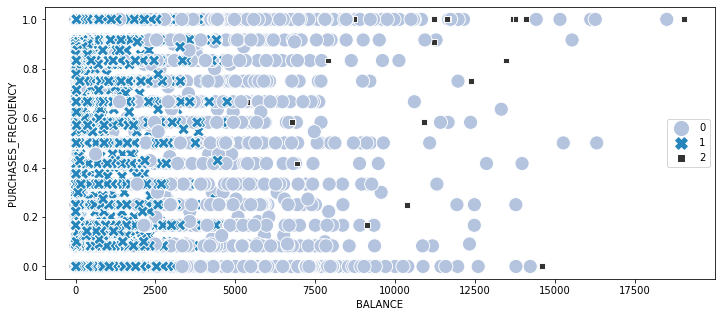

In [34]:
# Visualize
plt.figure(figsize=(12, 5))
sns.scatterplot(x='BALANCE', y='PURCHASES_FREQUENCY', data=cluster, hue='cluster_label',
                palette='PuBu_d', style='cluster_label', size='cluster_label', sizes=(200, 70), legend='full')
plt.legend(loc='center right')

The highest purchases_frequency and highest balance is in cluster 2

## EDA


In [35]:
cluster_labels = cluster['cluster_label']
cluster_labels

0       1
1       0
2       0
4       1
5       1
       ..
8943    1
8945    1
8947    1
8948    1
8949    1
Name: cluster_label, Length: 8636, dtype: int32

In [36]:
cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [37]:
index = list(range(0, 8950))
index = pd.DataFrame(index)
index

data_cluster = cluster
data_cluster['index'] = index
data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label,index
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,4
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1,8943
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1,8945
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1,8947
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1,8948


### 1. PURCHASES_FREQUENCY

In [38]:
data_count_p = data_cluster.groupby(['cluster_label', 'PURCHASES_FREQUENCY'], as_index=False).count()[['cluster_label', 'PURCHASES_FREQUENCY', 'index']]
data_count_p

,cluster_label,PURCHASES_FREQUENCY,index
0,0,0.000000,503
1,0,0.083333,118
2,0,0.090909,11
3,0,0.100000,3
4,0,0.111111,1
...,...,...,...
99,2,0.833333,6
100,2,0.900000,1
101,2,0.909091,1
102,2,0.916667,5


In [39]:
data_count_p['AVERAGE_PURCHASES_FREQUENCY'] = data_count_p.groupby(['cluster_label'])['PURCHASES_FREQUENCY'].transform('mean')
data_count_p

,cluster_label,PURCHASES_FREQUENCY,index,AVERAGE_PURCHASES_FREQUENCY
0,0,0.000000,503,0.506195
1,0,0.083333,118,0.506195
2,0,0.090909,11,0.506195
3,0,0.100000,3,0.506195
4,0,0.111111,1,0.506195
...,...,...,...,...
99,2,0.833333,6,0.553939
100,2,0.900000,1,0.553939
101,2,0.909091,1,0.553939
102,2,0.916667,5,0.553939


In [40]:
data_count_p = data_count_p.groupby(['cluster_label', 'AVERAGE_PURCHASES_FREQUENCY'], as_index=False).count()[['cluster_label', 'AVERAGE_PURCHASES_FREQUENCY', 'index']]
data_count_p

,cluster_label,AVERAGE_PURCHASES_FREQUENCY,index
0,0,0.506195,42
1,1,0.500000,47
2,2,0.553939,15


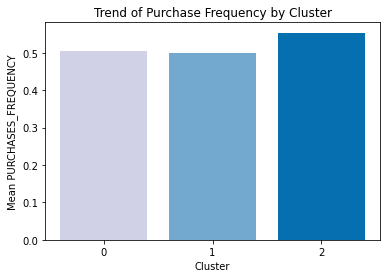

In [41]:
plt.title('Trend of Purchase Frequency by Cluster')
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Mean PURCHASES_FREQUENCY', fontsize=10)

list_x = data_count_p['cluster_label']
list_y = data_count_p['AVERAGE_PURCHASES_FREQUENCY']

colors = sns.color_palette('PuBu',len(list_x))

plt.bar(list_x, list_y, color=colors)

plt.xticks(np.arange(0,3, step=1), fontsize=10)
plt.show()

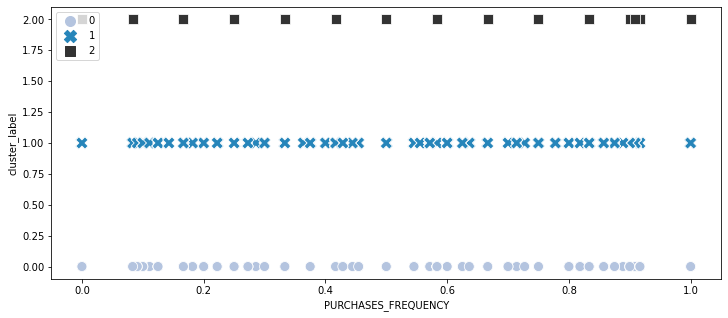

In [42]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='PURCHASES_FREQUENCY', y='cluster_label', data=cluster, hue='cluster_label',
                palette='PuBu_d', style='cluster_label', size='cluster_label', sizes=(100, 200), legend='full')
plt.legend(loc='upper left')

### 2. BALANCE

In [43]:
data_count_b = data_cluster.groupby(['cluster_label', 'BALANCE'], as_index=False).count()[['cluster_label', 'BALANCE', 'index']]
data_count_b

,cluster_label,BALANCE,index
0,0,0.437285,1
1,0,0.488050,1
2,0,0.672519,1
3,0,1.059425,1
4,0,1.470582,1
...,...,...,...
8626,2,13763.473580,1
8627,2,14100.251100,1
8628,2,14581.459140,1
8629,2,15244.748650,1


In [44]:
data_count_b['AVERAGE_BALANCE'] = data_count_b.groupby(['cluster_label'])['BALANCE'].transform('mean')
data_count_b

,cluster_label,BALANCE,index,AVERAGE_BALANCE
0,0,0.437285,1,3485.453034
1,0,0.488050,1,3485.453034
2,0,0.672519,1,3485.453034
3,0,1.059425,1,3485.453034
4,0,1.470582,1,3485.453034
...,...,...,...,...
8626,2,13763.473580,1,4830.733787
8627,2,14100.251100,1,4830.733787
8628,2,14581.459140,1,4830.733787
8629,2,15244.748650,1,4830.733787


In [45]:
data_count_b = data_count_b.groupby(['cluster_label', 'AVERAGE_BALANCE'], as_index=False).count()[['cluster_label', 'AVERAGE_BALANCE', 'index']]
data_count_b

,cluster_label,AVERAGE_BALANCE,index
0,0,3485.453034,2194
1,1,881.718227,6309
2,2,4830.733787,128


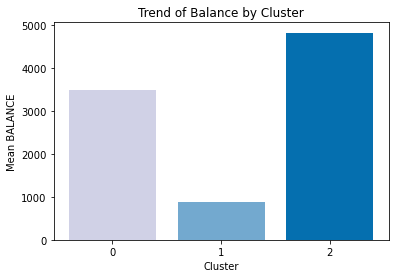

In [46]:
plt.title('Trend of Balance by Cluster')
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Mean BALANCE', fontsize=10)

list_x = data_count_b['cluster_label']
list_y = data_count_b['AVERAGE_BALANCE']

colors = sns.color_palette('PuBu',len(list_x))

plt.bar(list_x, list_y, color=colors)

plt.xticks(np.arange(0,3, step=1), fontsize=10)
plt.show()

# Another way

In [47]:
data_new_cluster = data[['PURCHASES_FREQUENCY', 'BALANCE']]
data_new_cluster

,PURCHASES_FREQUENCY,BALANCE
0,0.166667,40.900749
1,0.000000,3202.467416
2,1.000000,2495.148862
3,0.083333,1666.670542
4,0.083333,817.714335
...,...,...
8945,1.000000,28.493517
8946,1.000000,19.183215
8947,0.833333,23.398673
8948,0.000000,13.457564


In [48]:
# Instantiate the KMeans for 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(data_new_cluster)

# Calculate Silhoutte Score
score = silhouette_score(data_new_cluster, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.631


In [49]:
cluster = data_new_cluster.copy()
cluster_pred = kmeans.predict(data_new_cluster)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[2 0 0 ... 2 2 2]
   PURCHASES_FREQUENCY      BALANCE  cluster_label
0             0.166667    40.900749              2
1             0.000000  3202.467416              0
2             1.000000  2495.148862              0
3             0.083333  1666.670542              6
4             0.083333   817.714335              7


In [50]:
cluster['cluster_label']

0       2
1       0
2       0
3       6
4       7
       ..
8945    2
8946    2
8947    2
8948    2
8949    2
Name: cluster_label, Length: 8950, dtype: int32

In [51]:
cluster_cc = pd.DataFrame(cluster)
cluster_cc

,PURCHASES_FREQUENCY,BALANCE,cluster_label
0,0.166667,40.900749,2
1,0.000000,3202.467416,0
2,1.000000,2495.148862,0
3,0.083333,1666.670542,6
4,0.083333,817.714335,7
...,...,...,...
8945,1.000000,28.493517,2
8946,1.000000,19.183215,2
8947,0.833333,23.398673,2
8948,0.000000,13.457564,2


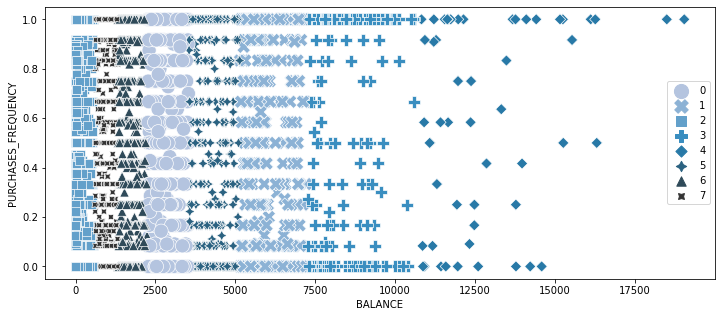

In [52]:
# Visualize
plt.figure(figsize=(12, 5))
sns.scatterplot(x='BALANCE', y='PURCHASES_FREQUENCY', data=cluster_cc, hue='cluster_label',
                palette='PuBu_d', style='cluster_label', size='cluster_label', sizes=(200, 70), legend='full')
plt.legend(loc='center right')

In [53]:
# Instantiate the KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
kmeans.fit_predict(data_new_cluster)

# Calculate Silhoutte Score
score = silhouette_score(data_new_cluster, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Average Score: %.3f' % score)

Silhouette Average Score: 0.656


In [54]:
cluster = data_new_cluster.copy()
cluster_pred = kmeans.predict(data_new_cluster)
centers = kmeans.cluster_centers_
print(cluster_pred)

cluster['cluster_label'] = cluster_pred
print(cluster.head())

[2 0 0 ... 2 2 2]
   PURCHASES_FREQUENCY      BALANCE  cluster_label
0             0.166667    40.900749              2
1             0.000000  3202.467416              0
2             1.000000  2495.148862              0
3             0.083333  1666.670542              2
4             0.083333   817.714335              2


In [55]:
cluster_cc = pd.DataFrame(cluster)
cluster_cc

,PURCHASES_FREQUENCY,BALANCE,cluster_label
0,0.166667,40.900749,2
1,0.000000,3202.467416,0
2,1.000000,2495.148862,0
3,0.083333,1666.670542,2
4,0.083333,817.714335,2
...,...,...,...
8945,1.000000,28.493517,2
8946,1.000000,19.183215,2
8947,0.833333,23.398673,2
8948,0.000000,13.457564,2


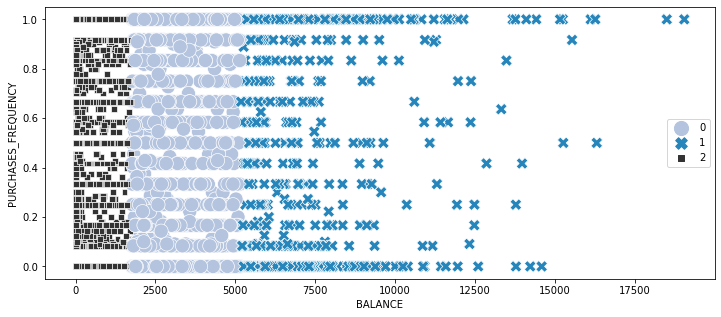

In [56]:
# Visualize
plt.figure(figsize=(12, 5))
sns.scatterplot(x='BALANCE', y='PURCHASES_FREQUENCY', data=cluster_cc, hue='cluster_label',
                palette='PuBu_d', style='cluster_label', size='cluster_label', sizes=(200, 70), legend='full')
plt.legend(loc='center right')